# PROYECTO 1

# Desafío Empresarial: Análisis de Cohortes para los Pagos de Ironhack

**Análisis Exploratorio de Datos (EDA)**


Antes de sumergirnos en el análisis de cohortes, realizamos un análisis exploratorio de datos para obtener una comprensión completa del conjunto de datos. Exploramos estadísticas clave, distribuciones y visualizaciones para identificar patrones y valores atípicos.

**1. Informarse del Negocio**

Saber la repercusión de cada variable sobre el negocio y la variable objetivo: rangos de cada variable, valores medios, etc (en general)

In [1]:
#Carga de Datos y Importación de bibliotecas de Python
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
import warnings

# Suprimir todos los warnings (opcional, con precaución)
warnings.filterwarnings("ignore")

cash = pd.read_csv('extract - cash request - data analyst.csv')
fees = pd.read_csv('extract - fees - data analyst - .csv')

df = pd.merge(cash, fees, on='id', how='inner')
df.shape

(18433, 28)

**2. Analisis Exploratorio**

a. Var objetivo: 

    i. Tipo de dato: classificación (nm, n, i)
    ii. Estadística descriptiva    
    iii. Fun. distribuición
    
    
b. Variables independientes

    i. Tipo de dato: classificación (nm, n, i)    
    ii. Estadística descriptiva    
    iii. Fun. distribución    
    iv. Interpretar la variabla en base a la Fun. Dist de la objetivo

In [2]:
#asignamos la variable registros y miramos el total de registros en el dataframe
registros = df.shape[0]

**3. Analisis de la calidad de los datos**


Explora técnicas para detectar y rectificar valores faltantes, inconsistencias y errores usando Python, salvaguardando así la precisión del conjunto de datos para el análisis de cohortes subsiguiente.

a. Presencia de outliers => corregir o imputar a perdido

    i. Corregir por: media, moda, mediana, regresión
    ii. Imputar a NaN
    iii.Eliminar el registro
    
b. Presencia de misings (perdidos):

    i.Corregir por: media, moda, mediana, regresión
    ii. Eliminar el registro

3.1.1 Información General de los Datos: Miramos la información general de las variables

In [3]:
#quitamos la cabecera
df = df.iloc[:,1:] 
df.head()

,amount,status_x,created_at_x,updated_at_x,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,...,status_y,category,total_amount,reason,created_at_y,updated_at_y,paid_at,from_date,to_date,charge_moment
0,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,...,accepted,NaN,5.0,Postpone Cash Request 2568,2020-06-09 10:55:46.687183+00,2020-10-13 14:25:01.328917+00,NaN,2020-06-26 22:00:00+00,2020-07-26 22:00:00+00,before
1,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 1796,2020-06-23 08:20:48.886973+00,2020-10-13 14:25:14.644112+00,NaN,2020-06-06 22:00:00+00,2020-07-05 21:44:16.477+00,after
2,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,...,cancelled,NaN,5.0,Postpone Cash Request 1518,2020-06-23 08:20:48.412006+00,2020-10-13 14:25:15.072076+00,NaN,2020-05-27 22:00:00+00,2020-06-27 03:49:38.153+00,after
3,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,...,accepted,NaN,5.0,Postpone Cash Request 2278,2020-05-30 03:49:55.393806+00,2020-10-13 14:25:00.784465+00,NaN,2020-06-12 22:00:00+00,2020-07-09 22:00:00+00,before
4,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,...,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-07-18 22:29:38.254506+00,2020-10-13 14:25:04.253057+00,2020-10-19 10:59:55.753868+00,NaN,NaN,after


In [4]:
#sb.pairplot(data = df.dropna(),
#           hue = 'status_x',
#            height = 4,
#            vars = ['type', 'status_x', 'status_y', 'transfer_type'],
#            kind = 'reg'
#           )

In [5]:
# Convertir la columna 'created_at_x' a datetime
df['created_at_x'] = pd.to_datetime(df['created_at_x'])

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18433 entries, 0 to 18432
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   amount                      18433 non-null  float64            
 1   status_x                    18433 non-null  object             
 2   created_at_x                18433 non-null  datetime64[ns, UTC]
 3   updated_at_x                18433 non-null  object             
 4   user_id                     16460 non-null  float64            
 5   moderated_at                15562 non-null  object             
 6   deleted_account_id          1974 non-null   float64            
 7   reimbursement_date          18433 non-null  object             
 8   cash_request_received_date  11622 non-null  object             
 9   money_back_date             11466 non-null  object             
 10  transfer_type               18433 non-null  object        

3.1.2 Estadísticas Descriptivas: Calculamos estadísticas descriptivas para las columnas numéricas.

In [7]:
# Calcular estadísticas descriptivas para las columnas 'amount', que nos da 
stats = df[['amount', 'total_amount']].describe().transpose()
print(stats)

                count       mean        std  min   25%    50%    75%    max
amount        18433.0  87.187164  22.756164  1.0  80.0  100.0  100.0  200.0
total_amount  18433.0   5.000271   0.036827  5.0   5.0    5.0    5.0   10.0


In [8]:
df['total_amount'].unique()

array([ 5., 10.])

3.1.4 Visualización de Distribuciones: Visualizamos los datos en histogramas

In [9]:
# Contar los valores en las columnas categoricas
type = df['type'].value_counts()
status_cash = df['status_x'].value_counts()
status_fees = df['status_y'].value_counts()
transfer_type = df['transfer_type'].value_counts()

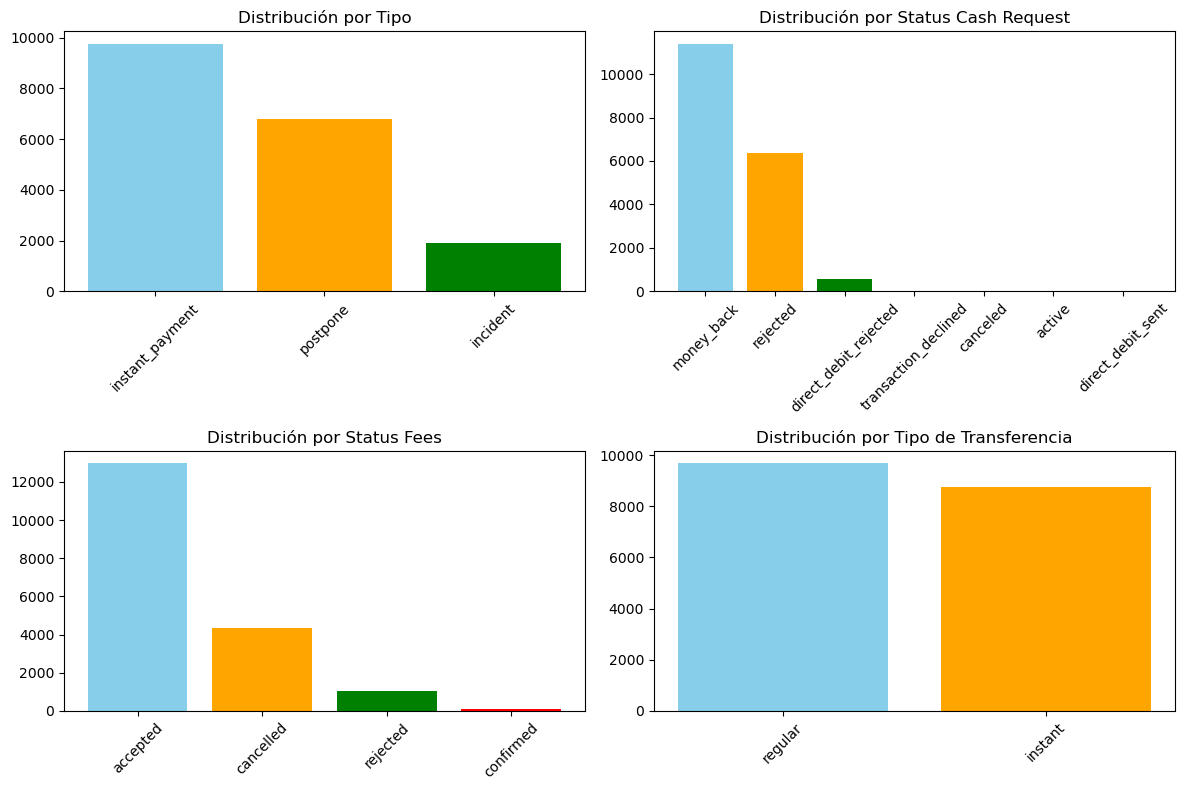

In [10]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Lista de colores
colors = ['skyblue', 'orange', 'green', 'red']

# Histograma de 'type'
axs[0,0].bar(type.index, type.values, color=colors[:len(type)])
axs[0,0].set_title('Distribución por Tipo', fontsize=12)
axs[0,0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotar etiquetas del eje x
axs[0,0].tick_params(axis='y', labelsize=10)

# Histograma de 'status_cash'
axs[0,1].bar(status_cash.index, status_cash.values, color=colors[:len(status_cash)])
axs[0,1].set_title('Distribución por Status Cash Request', fontsize=12)
axs[0,1].tick_params(axis='x', rotation=45, labelsize=10)  # Rotar etiquetas del eje x
axs[0,1].tick_params(axis='y', labelsize=10)

# Histograma de 'status_fees'
axs[1,0].bar(status_fees.index, status_fees.values, color=colors[:len(status_fees)])
axs[1,0].set_title('Distribución por Status Fees', fontsize=12)
axs[1,0].tick_params(axis='x', rotation=45, labelsize=10)  # Rotar etiquetas del eje x
axs[1,0].tick_params(axis='y', labelsize=10)

# Histograma de 'transfer_type'
axs[1,1].bar(transfer_type.index, transfer_type.values, color=colors[:len(transfer_type)])
axs[1,1].set_title('Distribución por Tipo de Transferencia', fontsize=12)
axs[1,1].tick_params(axis='x', rotation=45, labelsize=10)  # Rotar etiquetas del eje x
axs[1,1].tick_params(axis='y', labelsize=10)

# Ajustar diseño
plt.tight_layout()
plt.show()


**2.2 Creación de cohortes**


En esta fase, nos centramos en construir cohortes basándonos en el mes inicial del primer anticipo de efectivo y calcular métricas clave como la frecuencia de uso del servicio, tasas de incidencia e ingresos por cohorte. Esta parte es esencial para entender las tendencias de comportamiento de los usuarios a lo largo del tiempo y la contribución financiera de los servicios de Ironhack.

El análisis de cohortes se refiere a una técnica de análisis que agrupa a los usuarios en cohortes o segmentos basados en un atributo compartido, generalmente el tiempo en que realizaron una acción específica por primera vez. En este caso, las cohortes se definen por el mes de creación del primer adelanto de efectivo de los usuarios.

In [11]:
# Convertir la columna 'created_at_x' a datetime
df['created_at_x'] = pd.to_datetime(df['created_at_x'])

# Extraer el mes y año de la fecha de creación del primer anticipo de efectivo
df['cohort_month'] = df['created_at_x'].dt.to_period('M')

# Encontrar la primera fecha de creación del anticipo de efectivo para cada usuario
cohort_data = df.groupby('user_id')['created_at_x'].min().reset_index()
cohort_data.rename(columns={'created_at_x': 'cohort_date'}, inplace=True)

# Fusionar la información de la cohorte de vuelta al DataFrame original
df = pd.merge(df, cohort_data, on='user_id', how='left')

**3. Métricas a Analizar**
Calcularemos y analizaremos las siguientes métricas para cada cohorte:

*__Frecuencia de Uso del Servicio__: Comprender con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de IronHack Payments a lo largo del tiempo.

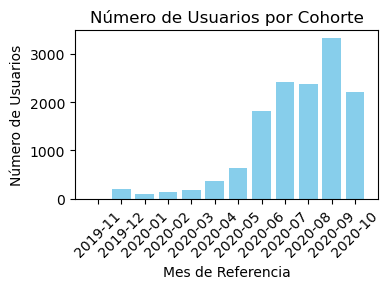

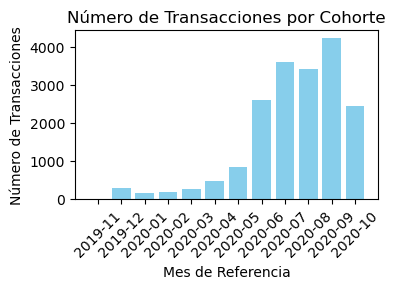

In [12]:
# Calcular el número de usuarios por cohorte
cohort_counts = df.groupby(['cohort_month'])['user_id'].nunique()

# Calcular el número de transacciones por cohorte
cohort_transactions = df.groupby(['cohort_month']).size()

# Histograma de número de usuarios por cohorte
plt.figure(figsize=(4, 3))
plt.bar(cohort_counts.index.astype(str), cohort_counts.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Número de Usuarios')
plt.title('Número de Usuarios por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma de número de transacciones por cohorte
plt.figure(figsize=(4, 3))
plt.bar(cohort_transactions.index.astype(str), cohort_transactions.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Número de Transacciones')
plt.title('Número de Transacciones por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*__Tasa de Incidentes__: Determinar la tasa de incidentes, enfocándose específicamente en los incidentes de pago, para cada cohorte. Identificar si hay variaciones en las tasas de incidentes entre diferentes cohortes.


In [13]:
df['recovery_status'].fillna('None', inplace=True)

In [14]:
recovery_counts=df['recovery_status'].value_counts()
recovery_counts

None                    16047
completed                1810
pending                   563
pending_direct_debit       13
Name: recovery_status, dtype: int64

In [15]:
# Calcula la tasa de incidentes
tasa_incidentes = df[df['recovery_status'] != 'None'].shape[0] / registros

# Imprime solamente el número de la tasa
print(f'La tasa de incidentes es de: {tasa_incidentes * 100:.2f} %.')

La tasa de incidentes es de: 12.94 %.


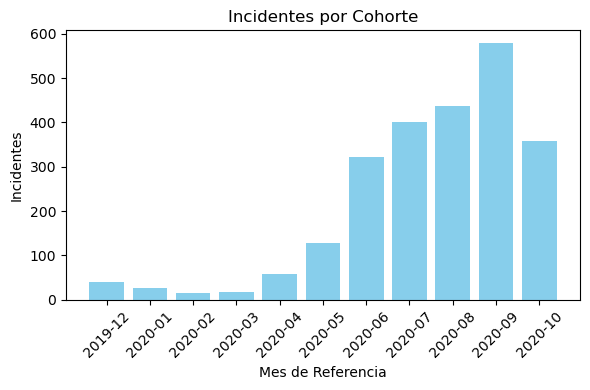

In [16]:
# Calcular incidentes por cohorte
cohort_incident = df[df['recovery_status'] != 'None'].groupby(['cohort_month'])['recovery_status'].count()

# Histograma de ingresos por cohorte
plt.figure(figsize=(6, 4))
plt.bar(cohort_incident.index.astype(str), cohort_incident.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Incidentes')
plt.title('Incidentes por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*__Ingresos Generados por la Cohorte__: Calcular el total de ingresos generados por cada cohorte a lo largo de los meses para evaluar el impacto financiero del comportamiento de los usuarios.

In [17]:
# Calcular ingresos (fees) por cohorte
cohort_revenue = df.groupby(['cohort_month'])['total_amount'].sum()

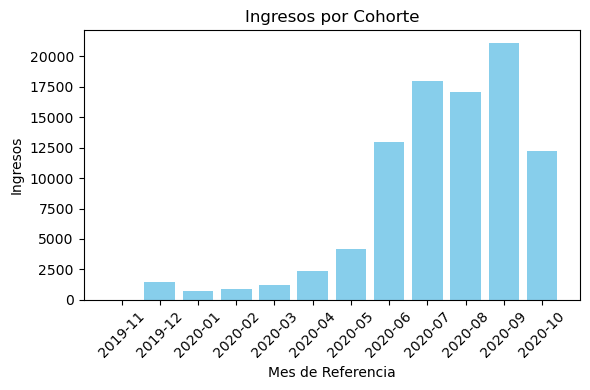

In [18]:
# Histograma de ingresos por cohorte
plt.figure(figsize=(6, 4))
plt.bar(cohort_revenue.index.astype(str), cohort_revenue.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Ingresos')
plt.title('Ingresos por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*__Nueva Métrica Relevante__: Proponer y calcular una nueva métrica relevante que brinde perspectivas adicionales sobre el comportamiento de los usuarios o el rendimiento de los servicios de IronHack Payments.

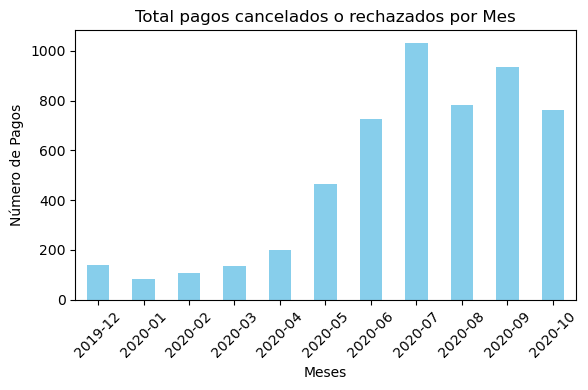

In [19]:
# Calcular Pagos Cancelados y Aceptados por cohorte
cohort_status = df[(df['status_y'] == 'rejected')|(df['status_y'] == 'cancelled') ].groupby(['cohort_month'])['status_y'].count()

# Plotear histograma de categorías por cohorte
cohort_status.plot(kind='bar', stacked=True, figsize=(6, 4), color=['skyblue'])
plt.xlabel('Meses')
plt.ylabel('Número de Pagos')
plt.title('Total pagos cancelados o rechazados por Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.1.3 Valores Nulos y Duplicados: Revisamos si hay valores nulos y duplicados en los datos.

In [20]:
#miramos si hay duplicados
print(df.duplicated().sum())

0


In [21]:
#miramos si hay nulos
print(df.isnull().sum())

amount                            0
status_x                          0
created_at_x                      0
updated_at_x                      0
user_id                        1973
moderated_at                   2871
deleted_account_id            16459
reimbursement_date                0
cash_request_received_date     6811
money_back_date                6967
transfer_type                     0
send_at                        7225
recovery_status                   0
reco_creation                 16047
reco_last_update              16047
cash_request_id                   2
type                              0
status_y                          0
category                      16543
total_amount                      0
reason                            0
created_at_y                      0
updated_at_y                      0
paid_at                        4841
from_date                     11648
to_date                       11648
charge_moment                     0
cohort_month                

In [22]:
#user_id nulos se tienen que borrar
#recovery_status no se puede borrar porque la necesitaremos para los analisis

In [23]:
# Filtrar las columnas que tienen menos del 20% de nulos (salvo la columna 'user_id')
#Separar la columna 'user_id'
#user_id = df['user_id']

#por = 0.2 * len(df)
#df_var = df.isnull().sum()
#df_var = df_var[df_var < por]
#list_var_OK = df_var.index.drop('user_id', errors='ignore')
#df = df[list_var_OK]

# Volver a agregar la columna 'user_id' 
#df['user_id'] = user_id

In [24]:
df.shape

(18433, 29)

In [25]:
df = df.dropna(subset=['user_id'])

In [26]:
df.isnull().sum()

amount                            0
status_x                          0
created_at_x                      0
updated_at_x                      0
user_id                           0
moderated_at                   2781
deleted_account_id            16459
reimbursement_date                0
cash_request_received_date     5462
money_back_date                5603
transfer_type                     0
send_at                        6238
recovery_status                   0
reco_creation                 14250
reco_last_update              14250
cash_request_id                   2
type                              0
status_y                          0
category                      14796
total_amount                      0
reason                            0
created_at_y                      0
updated_at_y                      0
paid_at                        4290
from_date                     10440
to_date                       10440
charge_moment                     0
cohort_month                

In [27]:
df.shape

(16460, 29)

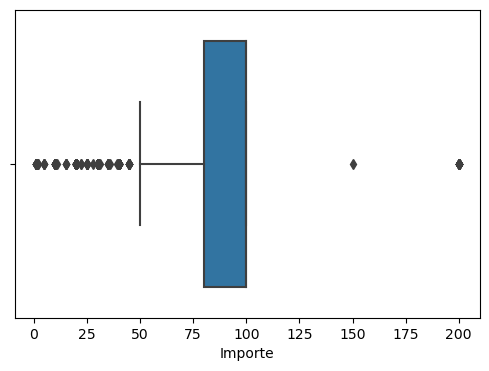

In [28]:
#miramos si hay outliers en las dos variables numericas 'amount'

#Crear la figura con un solo subgráfico
fig, ax = plt.subplots(figsize=(6, 4))

#Diagrama de caja y bigotes
sb.boxplot(x=df['amount'].dropna(), ax=ax)  
#-ax.set_title('Diagrama de Caja y Bigotes de los Importes Solicitados')
ax.set_xlabel('Importe')

# Mostrar el gráfico
plt.show()

**2. Analisis Exploratorio (después de la corrección de los datos)**

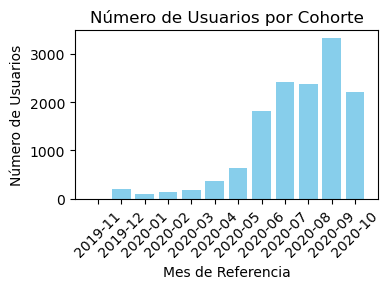

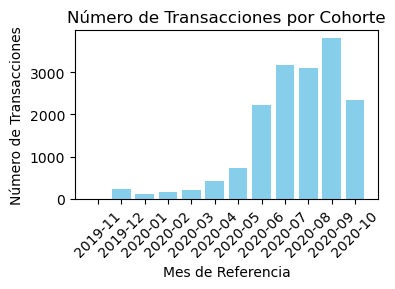

In [29]:
# Calcular el número de usuarios por cohorte
cohort_counts = df.groupby(['cohort_month'])['user_id'].nunique()

# Calcular el número de transacciones por cohorte
cohort_transactions = df.groupby(['cohort_month']).size()

# Histograma de número de usuarios por cohorte
plt.figure(figsize=(4, 3))
plt.bar(cohort_counts.index.astype(str), cohort_counts.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Número de Usuarios')
plt.title('Número de Usuarios por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histograma de número de transacciones por cohorte
plt.figure(figsize=(4, 3))
plt.bar(cohort_transactions.index.astype(str), cohort_transactions.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Número de Transacciones')
plt.title('Número de Transacciones por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

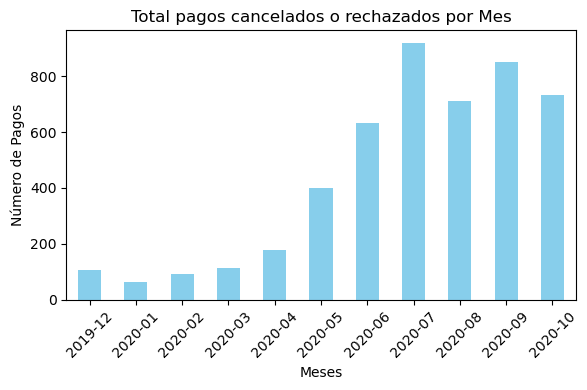

In [30]:
# Calcular Pagos Cancelados y Aceptados por cohorte
cohort_status = df[(df['status_y'] == 'rejected')|(df['status_y'] == 'cancelled') ].groupby(['cohort_month'])['status_y'].count()

# Plotear histograma de categorías por cohorte
cohort_status.plot(kind='bar', stacked=True, figsize=(6, 4), color=['skyblue'])
plt.xlabel('Meses')
plt.ylabel('Número de Pagos')
plt.title('Total pagos cancelados o rechazados por Mes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
# Calcula la tasa de incidentes
tasa_incidentes = df[df['recovery_status'] != 'None'].shape[0] / registros

# Imprime solamente el número de la tasa
print(f'La tasa de incidentes es de: {tasa_incidentes * 100:.2f} %.')

La tasa de incidentes es de: 11.99 %.


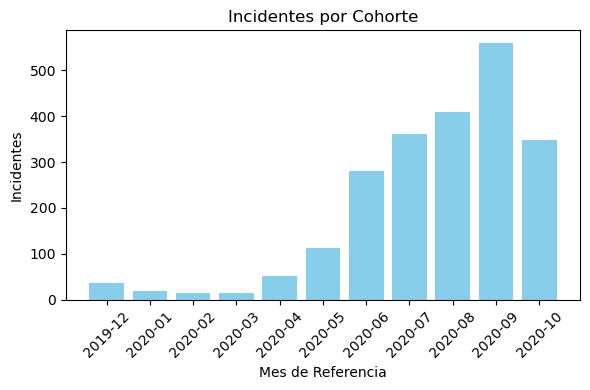

In [32]:
# Calcular incidentes por cohorte
cohort_incident = df[df['recovery_status'] != 'None'].groupby(['cohort_month'])['recovery_status'].count()

# Histograma de ingresos por cohorte
plt.figure(figsize=(6, 4))
plt.bar(cohort_incident.index.astype(str), cohort_incident.values, color='skyblue')
plt.xlabel('Mes de Referencia')
plt.ylabel('Incidentes')
plt.title('Incidentes por Cohorte')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()